In [1]:
import fastai
from fastai.vision.all import *
import os
from PIL import Image
import pandas as pd
import shutil
import torch

In [2]:
torch._C._cuda_getDeviceCount() 

1

#### Preprocessing

In [3]:
os.chdir('C:/Users/jwst2/Python/tesis/jpg/')
if os.path.isdir('jabar10m_idm/MAJU') is False:
    os.makedirs('jabar10m_idm/MAJU')
    os.makedirs('jabar10m_idm/BERKEMBANG')
    os.makedirs('jabar10m_idm/TERTINGGAL')
    os.makedirs('jabar10m_idm/SANGAT TERTINGGAL')
    os.makedirs('jabar10m_idm/MANDIRI')

In [4]:
idm = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/idm_jabar.csv")

In [5]:
idm.head()

,desa,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm,status
0,3201022001,WANAHERANG,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.9486,0.8500,0.3333,0.7106,MAJU
1,3201022007,CICADAS,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.9371,0.8833,0.6000,0.8068,MAJU
2,3201022008,CIKEAS UDIK,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.8800,0.6833,0.6000,0.7211,MAJU
3,3201022010,KARANGGAN,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.8114,0.8167,0.6000,0.7427,MAJU
4,3201032008,KARANG ASEM TIMUR,320103,CITEUREUP,3201,KABUPATEN BOGOR,0.8286,0.7000,0.6000,0.7095,MAJU


In [6]:
convrt_code = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/diskominfo-od_kode_wilayah_dan_nama_wilayah_desa_kelurahan_data.csv")

In [7]:
convrt_code.kemendagri_kelurahan_kode = convrt_code.kemendagri_kelurahan_kode.str.replace(".","")

C:\Users\jwst2\AppData\Local\Temp/ipykernel_24748/691296655.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  convrt_code.kemendagri_kelurahan_kode = convrt_code.kemendagri_kelurahan_kode.str.replace(".","")


In [8]:
convrt_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984 entries, 0 to 5983
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5984 non-null   int64  
 1   kemendagri_provinsi_kode   5984 non-null   int64  
 2   kemendagri_kota_kode       5984 non-null   float64
 3   kemendagri_kecamatan_kode  5984 non-null   object 
 4   kemendagri_kelurahan_kode  5984 non-null   object 
 5   kemendagri_provinsi_nama   5984 non-null   object 
 6   kemendagri_kota_nama       5984 non-null   object 
 7   kemendagri_kecamatan_nama  5984 non-null   object 
 8   kemendagri_kelurahan_nama  5984 non-null   object 
 9   bps_provinsi_kode          5836 non-null   float64
 10  bps_kota_kode              5836 non-null   float64
 11  bps_kecamatan_kode         5836 non-null   float64
 12  bps_kelurahan_kode         5836 non-null   float64
 13  bps_provinsi_nama          5836 non-null   objec

In [9]:
idm["desa"] = idm["desa"].apply(str)

In [10]:
idm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   desa            5312 non-null   object 
 1   nama            5312 non-null   object 
 2   id_kecamatan    5312 non-null   int64  
 3   nama_kecamatan  5312 non-null   object 
 4   id_kabupaten    5312 non-null   int64  
 5   nama_kabupaten  5312 non-null   object 
 6   iks             5312 non-null   float64
 7   ike             5312 non-null   float64
 8   ikl             5312 non-null   float64
 9   avg_idm         5312 non-null   float64
 10  status          5312 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 456.6+ KB


In [11]:
idm = idm.set_index('desa').join(convrt_code.set_index('kemendagri_kelurahan_kode'))
idm.to_csv("trs.csv")

In [12]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/gen_desa_10m/"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        if(not idm.status[idm.bps_kelurahan_kode == int(name.replace(".jpg",""))].empty):
            if(idm.status[idm.bps_kelurahan_kode == int(name.replace(".jpg",""))].iloc[0] == "MAJU"):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/jabar10m_idm/MAJU/"+name)
            elif(idm.status[idm.bps_kelurahan_kode == int(name.replace(".jpg",""))].iloc[0] == "BERKEMBANG"):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/jabar10m_idm/BERKEMBANG/"+name)
            elif(idm.status[idm.bps_kelurahan_kode == int(name.replace(".jpg",""))].iloc[0] == "TERTINGGAL"):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/jabar10m_idm/TERTINGGAL/"+name)
            elif(idm.status[idm.bps_kelurahan_kode == int(name.replace(".jpg",""))].iloc[0] == "SANGAT TERTINGGAL"):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/jabar10m_idm/SANGAT TERTINGGAL/"+name)
            elif(idm.status[idm.bps_kelurahan_kode == int(name.replace(".jpg",""))].iloc[0] == "MANDIRI"):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/jabar10m_idm/MANDIRI/"+name)
       

1it [00:04,  4.72s/it]


In [15]:
idm.status[idm.bps_kelurahan_kode == 3201030006]

Series([], Name: status, dtype: object)

#### Models

In [3]:
path = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/jabar10m_idm")

In [4]:
Path.BASE_PATH = path
path.ls()

(#4) [Path('BERKEMBANG'),Path('MAJU'),Path('MANDIRI'),Path('TERTINGGAL')]

In [5]:
fname = (path/"BERKEMBANG").ls()[0]
fname

Path('BERKEMBANG/3201010001.jpg')

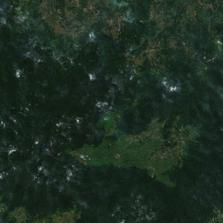

In [6]:
img = Image.open(fname)
img

In [7]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label, # extracts the label category from the image's folder name 
                 batch_tfms=aug_transforms(mult=2)) # data augmentation (mult multiplies the default transformation values)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


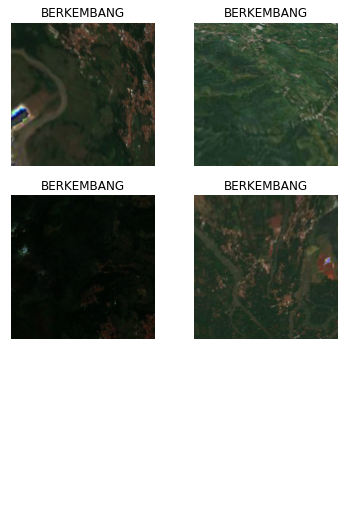

In [8]:
blocks = blocks.new(batch_tfms=aug_transforms(mult=2.0))
dls = blocks.dataloaders(path,bs=4)
dls.train.show_batch(nrows=3)

#### Densenet

In [9]:
avg = 'macro'
metrics=[accuracy, Precision(average=avg), Recall(average=avg), F1Score(average=avg)]
learn = cnn_learner(dls, densenet121, metrics=metrics) 

In [10]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.210357,1.287157,0.435453,0.306175,0.298947,0.293222,03:22


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.000178,0.915447,0.598266,0.259723,0.274504,0.259196,03:59
1,0.934239,0.909844,0.605973,0.339063,0.295056,0.292361,04:00
2,0.882289,0.966145,0.617534,0.264595,0.268160,0.238975,04:00
3,0.983055,0.945853,0.597302,0.376187,0.272304,0.257885,04:00
4,0.966445,0.956624,0.638728,0.359736,0.302434,0.295264,04:00
5,0.957228,0.962400,0.596339,0.412137,0.304858,0.306752,04:02
6,0.930894,0.919368,0.617534,0.350676,0.323671,0.320877,04:01
7,0.921705,1.088057,0.513487,0.317628,0.385854,0.327134,04:01
8,0.898275,0.981249,0.600193,0.272038,0.294248,0.282117,04:01
9,0.871576,0.915674,0.564547,0.328014,0.324723,0.320396,04:01


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\skl

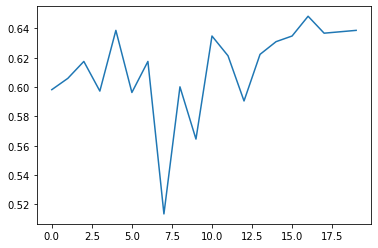

In [11]:
plt.plot(L(learn.recorder.values).itemgot(2));

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


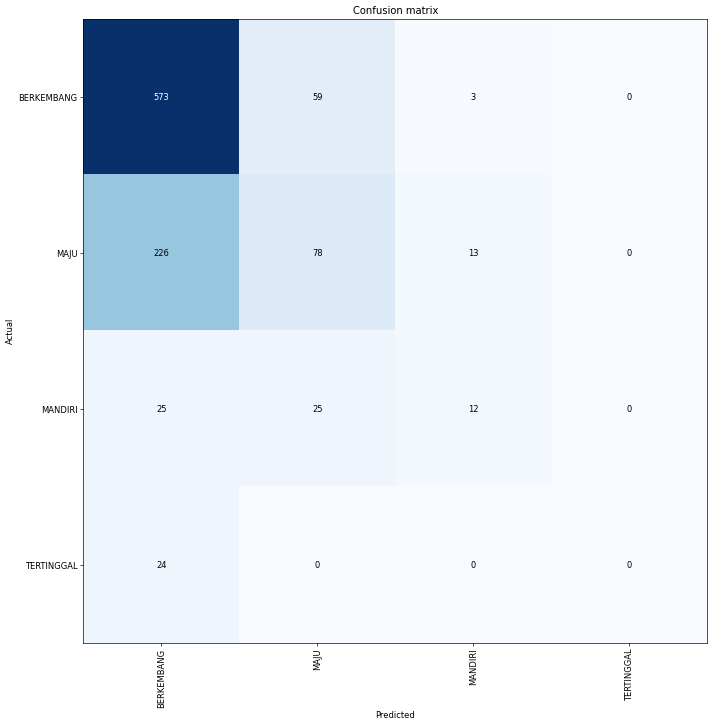

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [137]:
interp.most_confused(min_val=5)

[('MAJU', 'BERKEMBANG', 223),
 ('BERKEMBANG', 'MAJU', 78),
 ('MANDIRI', 'BERKEMBANG', 31),
 ('MANDIRI', 'MAJU', 29),
 ('TERTINGGAL', 'BERKEMBANG', 24),
 ('MAJU', 'MANDIRI', 6)]

In [13]:
learn.export('C:/Users/jwst2/Python/tesis/models/14012020_densenet121_idm_sentinel_10m_638_396.pkl')

#### Resnet

In [14]:
learn_rs = cnn_learner(dls, resnet50, metrics=metrics) 

In [15]:
learn_rs.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.312955,1.078461,0.567437,0.272573,0.267603,0.260987,01:51


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.020865,0.895410,0.601156,0.263842,0.274500,0.258538,02:27
1,1.044062,0.934069,0.601156,0.423199,0.271114,0.254788,02:29
2,0.939957,0.906265,0.584778,0.263342,0.277681,0.266882,02:31
3,0.966035,0.979047,0.611753,0.515946,0.274571,0.255689,02:26
4,0.881325,1.005116,0.615607,0.270817,0.281590,0.265092,02:26
5,1.015433,0.970802,0.628131,0.402069,0.276129,0.250185,02:27
6,0.897974,1.276580,0.605973,0.355109,0.342895,0.345023,02:28
7,0.935053,2.424860,0.615607,0.277105,0.259079,0.216520,02:27
8,0.934557,0.955775,0.610790,0.344786,0.319898,0.308585,02:27
9,0.913545,1.021740,0.616570,0.375348,0.370015,0.366505,02:26


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\skl

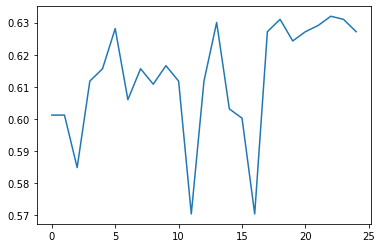

In [17]:
plt.plot(L(learn_rs.recorder.values).itemgot(2));

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


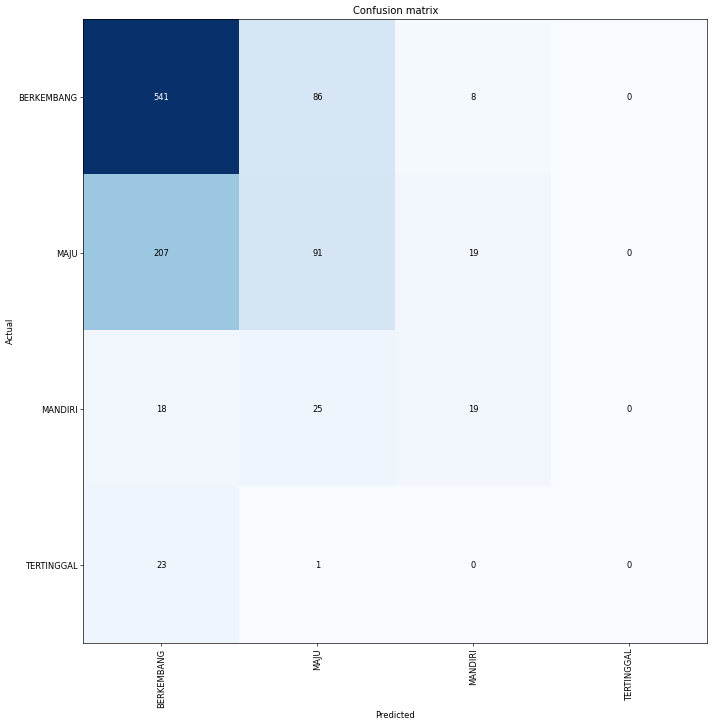

In [18]:
interp = ClassificationInterpretation.from_learner(learn_rs)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
learn_rs.export('C:/Users/jwst2/Python/tesis/models/04012020_resnet50_idm_sentinel_def_627_386.pkl')

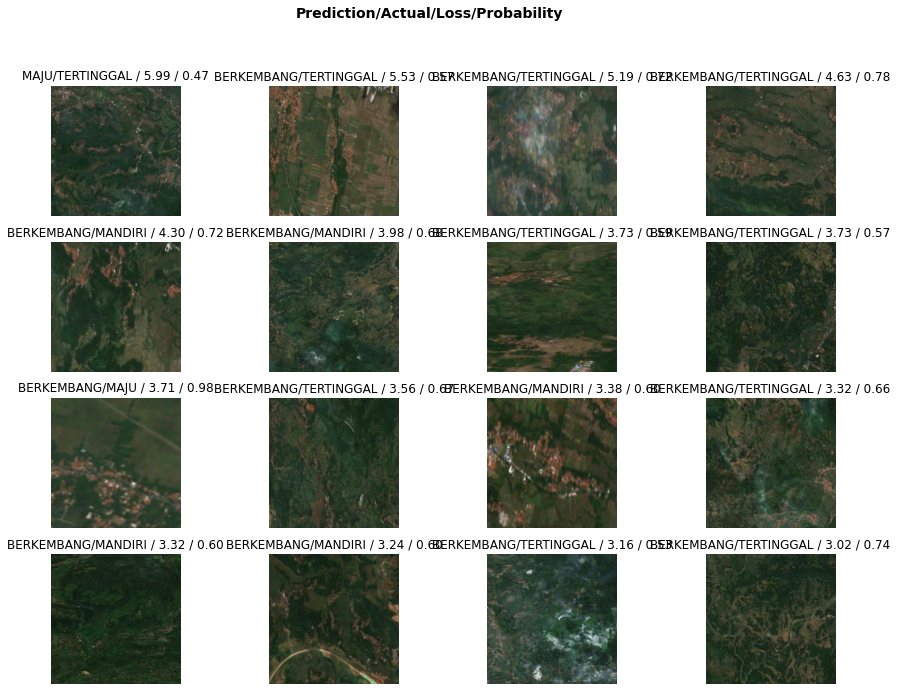

In [20]:
interp.plot_top_losses(16, figsize=(15,11))